# Importing Dataset and EDA

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
data=pd.read_csv("credit_scoring.csv")
data.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [3]:
data.isnull().sum()

Age                          0
Gender                       0
Marital Status               0
Education Level              0
Employment Status            0
Credit Utilization Ratio     0
Payment History              0
Number of Credit Accounts    0
Loan Amount                  0
Interest Rate                0
Loan Term                    0
Type of Loan                 0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [6]:
data.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


# Data Visualization

In [16]:
# Credit Utilization Ratio - To check outliers

fig = go.Figure()
fig.add_trace(go.Box(y=data['Credit Utilization Ratio']))

fig.update_layout(
    title='Credit Utilization Ratio',
    yaxis_title='Ratio (0-1)',
    showlegend=False
)

fig.show()

In [18]:
# Loan Amount Distribution
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['Loan Amount']))

fig.update_layout(
    title='Loan Amount Distribution',
    xaxis_title='Loan Amount',
    yaxis_title='Frequency',
    showlegend=False
)

fig.show()

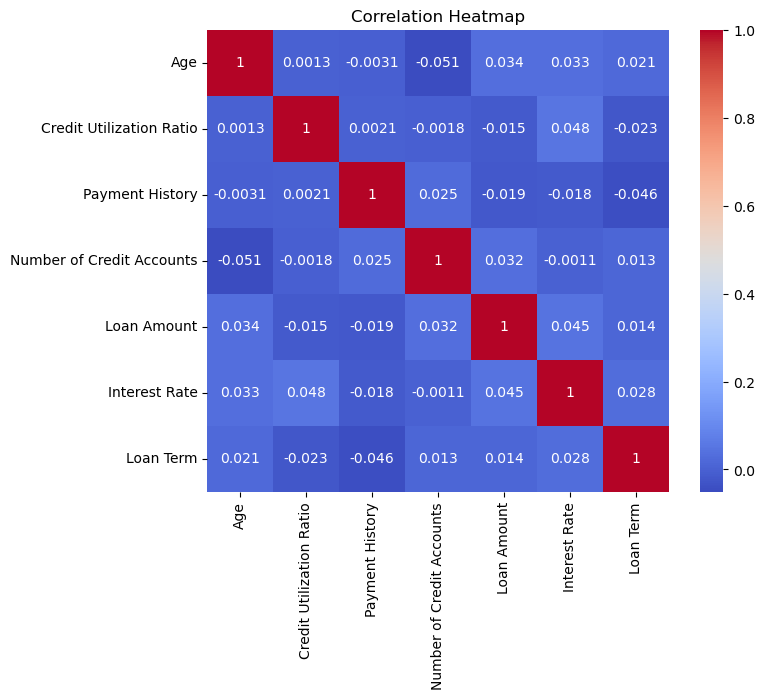

In [26]:
# correlation of data
corr=data[["Age","Credit Utilization Ratio","Payment History","Number of Credit Accounts","Loan Amount","Interest Rate","Loan Term"]]
corr_matrix=corr.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, ax=ax)

ax.set_title("Correlation Heatmap")
plt.show()

# Credit Score Calculation

In [27]:
data['Education Level'].unique()

array(['Master', 'High School', 'PhD', 'Bachelor'], dtype=object)

In [28]:
data['Employment Status'].unique()

array(['Employed', 'Unemployed', 'Self-Employed'], dtype=object)

In [29]:
## Converting Categorical Data into Numerical Data
education={"High School":1,"Bachelor":2,"Master":3,"PhD":4}
employment={"Unemployed":0,"Employed":1,"Self-Employed":2}

data['Education Level']=data['Education Level'].map(education)
data['Employment Status']=data['Employment Status'].map(employment)

In [31]:
## Calculating Credit Score using FICO Formula
credit=[]
for i in data.index:
    pay_hist=data.iloc[i]['Payment History']
    cur=data.iloc[i]['Credit Utilization Ratio']
    credit_acc=data.iloc[i]['Number of Credit Accounts']
    edu=data.iloc[i]['Education Level']
    emp=data.iloc[i]['Employment Status']
    
    score=(pay_hist*0.35)+(cur*0.30)+(credit_acc*0.15)+(edu*0.10)+(emp*0.10)
    credit.append(score)
    
data['Credit Score']=credit    

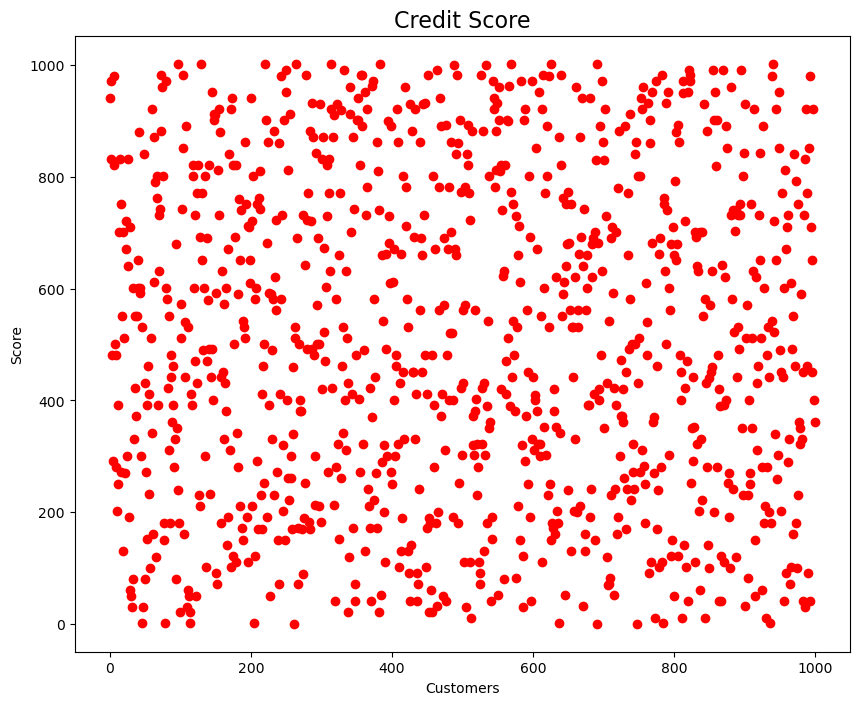

In [95]:
## Visualisation of Credit Score
x=data['Credit Score'].index
y=data['Credit Score']

plt.figure(figsize=(10,8))
plt.scatter(x,y,color='red')
plt.xlabel("Customers")
plt.ylabel("Score")
plt.title("Credit Score",fontsize=16)
plt.show()

# Segmentation of Customers

In [45]:
from sklearn.cluster import KMeans
X=data[['Credit Score']]
model=KMeans(n_clusters=4,n_init=10,random_state=50)
model.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=50)

In [51]:
data['Segments']=model.labels_
data

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score,Segments
0,60,Male,Married,3,1,0.22,2685.0,2,4675000,2.65,48,Personal Loan,940.516,1
1,25,Male,Married,1,0,0.20,2371.0,9,3619000,5.19,60,Auto Loan,831.360,1
2,30,Female,Single,3,1,0.22,2771.0,6,957000,2.76,12,Auto Loan,971.216,1
3,58,Female,Married,4,0,0.12,1371.0,2,4731000,6.57,60,Auto Loan,480.586,2
4,32,Male,Married,2,2,0.99,828.0,2,3289000,6.28,36,Personal Loan,290.797,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,Male,Divorced,1,1,0.74,1285.0,8,3530000,12.99,48,Auto Loan,451.372,2
996,64,Male,Divorced,2,0,0.77,1857.0,2,1377000,18.02,60,Home Loan,650.681,3
997,63,Female,Single,3,2,0.18,2628.0,10,2443000,18.95,12,Personal Loan,921.854,1
998,51,Female,Married,4,2,0.32,1142.0,3,1301000,1.80,24,Auto Loan,400.846,2


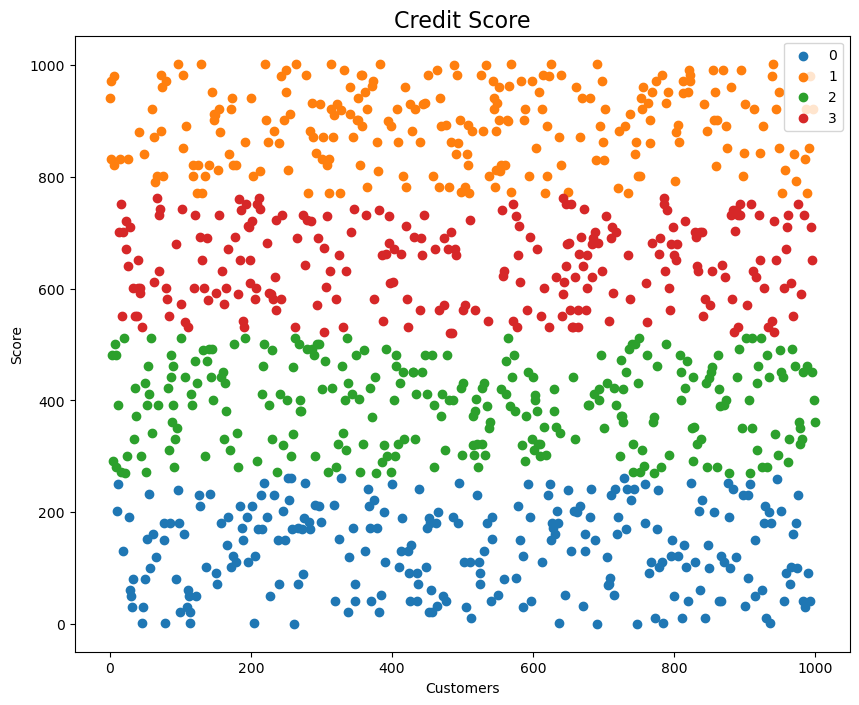

In [98]:
plt.figure(figsize=(10,8))
for i in range(0,4):
    plt.scatter(data[data['Segments']==i]['Credit Score'].index,data[data['Segments']==i]['Credit Score'],label=i)
plt.xlabel("Customers")
plt.ylabel("Score")
plt.legend()
plt.title("Credit Score",fontsize=16)
plt.show()

### From above visual we can say that each label belongs to following risk category:
### Class 0 - Very Low
### Class 2 - Low
### Class 3 - Good
### Class 1 - Excellent

In [99]:
risk={0:"Very Low",
      2:"Low",
      3:"Good",
      1:"Excellent"}
data['Segments']=data['Segments'].map(risk)
data

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score,Segments
0,60,Male,Married,3,1,0.22,2685.0,2,4675000,2.65,48,Personal Loan,940.516,Excellent
1,25,Male,Married,1,0,0.20,2371.0,9,3619000,5.19,60,Auto Loan,831.360,Excellent
2,30,Female,Single,3,1,0.22,2771.0,6,957000,2.76,12,Auto Loan,971.216,Excellent
3,58,Female,Married,4,0,0.12,1371.0,2,4731000,6.57,60,Auto Loan,480.586,Low
4,32,Male,Married,2,2,0.99,828.0,2,3289000,6.28,36,Personal Loan,290.797,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,Male,Divorced,1,1,0.74,1285.0,8,3530000,12.99,48,Auto Loan,451.372,Low
996,64,Male,Divorced,2,0,0.77,1857.0,2,1377000,18.02,60,Home Loan,650.681,Good
997,63,Female,Single,3,2,0.18,2628.0,10,2443000,18.95,12,Personal Loan,921.854,Excellent
998,51,Female,Married,4,2,0.32,1142.0,3,1301000,1.80,24,Auto Loan,400.846,Low


In [100]:
def label(n):
    if n==0:
        return "Very Low"
    elif n==1:
        return "Excellent"
    elif n==2:
        return "Low"
    elif n==3:
        return "Good"

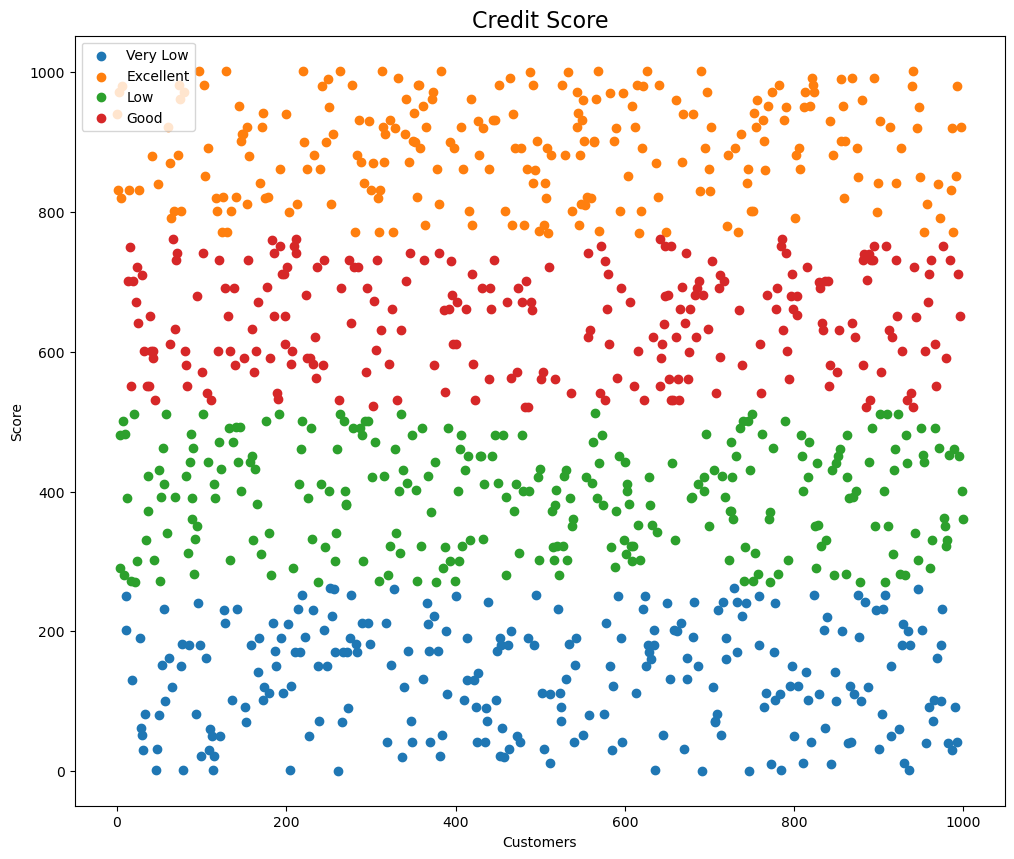

In [105]:
plt.figure(figsize=(12,10))
for i in range(0,4):
    plt.scatter(data[data['Segments']==label(i)]['Credit Score'].index,data[data['Segments']==label(i)]['Credit Score'],label=label(i))
plt.xlabel("Customers")
plt.ylabel("Score")
plt.legend()
plt.title("Credit Score",fontsize=16)
plt.show()